In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf

In [51]:
col_map = {'AGE':'age','S1Q10A':'income','S1Q1D2':'asian',
           'S1Q10A':'income','S1Q6A':'edu','S1Q1D3':'black',
           'S1Q1D5':'white','S1Q1C':'hispanich'}
col_names = [x for x in col_map.keys()]

In [52]:
#read data
data = pd.read_csv('/home/data-sci/Desktop/analysis/course/nesarc_pds.csv',
                   usecols=col_names)

In [53]:
#renaming the columns
data.rename(columns=col_map,inplace=True)
data.head()

,age,hispanich,asian,black,white,edu,income
0,23,1,2,2,1,8,17500
1,28,1,2,2,1,8,11000
2,81,1,2,2,1,6,6000
3,18,1,2,2,1,8,27000
4,36,2,2,1,2,12,42000


In [54]:
# reducing ethnicity to one column
def ethnicity(row):
    if row['white'] == 1:
        return int(1)
    if row['black'] == 1:
        return int(0)
    else:
        return int(2)

data['ethnicity'] = data.apply(lambda row: ethnicity(row), axis=1)
#reducing education to two values (for the purposes of this assignment)
def education(row):
    if row['edu'] < 10:
        return int(0)
    else:
        return int(1)
data['edu'] = data.apply(lambda row:education(row),axis=1)
#droing unwanted columns
data.drop(labels=['hispanich','asian','black','white'],inplace=True,axis=1)


In [55]:
data = data[(data['ethnicity'] == 1) | (data['ethnicity'] == 0)]

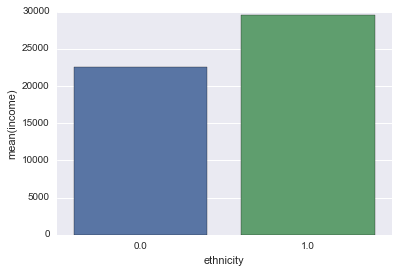

In [56]:
%matplotlib inline
sub = data.groupby(['ethnicity'])
sub = sub[['ethnicity','income']].mean()
#sub.reset_index(inplace=True)
seaborn.barplot(x=sub['ethnicity'],y=sub['income'],orient='v')

## The coloration between income and ethnicity 

In [57]:
reg1 = smf.ols('income ~ ethnicity', data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     183.3
Date:                Wed, 07 Dec 2016   Prob (F-statistic):           1.11e-41
Time:                        09:25:05   Log-Likelihood:            -4.9681e+05
No. Observations:               41192   AIC:                         9.936e+05
Df Residuals:                   41190   BIC:                         9.936e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.257e+04    456.553     49.447      0.000      2.17e+04  2.35e+04
ethnicity   6928.7335    511.722     13.540      0.000      5925.748  7931.719
==============================================================================
Omnibus:                    89924.157   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1352530525.150
Skew:                          19.426   Prob(JB):                         0.00
Kurtosis:                     889.863   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ***there is a statistically significant relationship between ethnicity and income ***

In [58]:
#Centering the age variable 
data['age'] = data['age']-data['age'].mean()

In [59]:
print(data.edu.mean())
print(data.age.mean())

0.5239609632938435
-1.3400005948939742e-13


### The coloration between income and ethnicity after controling for education and age 

In [60]:
reg2 = smf.ols('income ~ ethnicity + edu + age', data=data).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     850.2
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        09:25:27   Log-Likelihood:            -4.9566e+05
No. Observations:               41192   AIC:                         9.913e+05
Df Residuals:                   41188   BIC:                         9.914e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.354e+04    482.041     28.092      0.000      1.26e+04  1.45e+04
ethnicity   5338.9373    498.903     10.701      0.000      4361.076  6316.799
edu         1.966e+04    405.845     48.432      0.000      1.89e+04  2.05e+04
age          107.9787     11.103      9.725      0.000        86.216   129.741
==============================================================================
Omnibus:                    92510.419   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1686039785.898
Skew:                          20.769   Prob(JB):                         0.00
Kurtosis:                     993.265   Cond. No.                         60.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ***even after controlling for the potential confounder there's still a statistically significant coloration between the response and explanatory variable *** 